In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

In [3]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [4]:
df['Price'] = pd.DataFrame(dataset.target)

In [5]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## conclusion of data information: all the values are in the float

In [7]:
## 20640 are the rows and 9 columns present in the dataset
df.shape

(20640, 9)

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Conclusion of null values: There is no any null values present in the dataset

In [9]:
df.duplicated().sum()

0

## Conclusion of the duplicate values: There is no any duplicate value is present in the dataset

<AxesSubplot: >

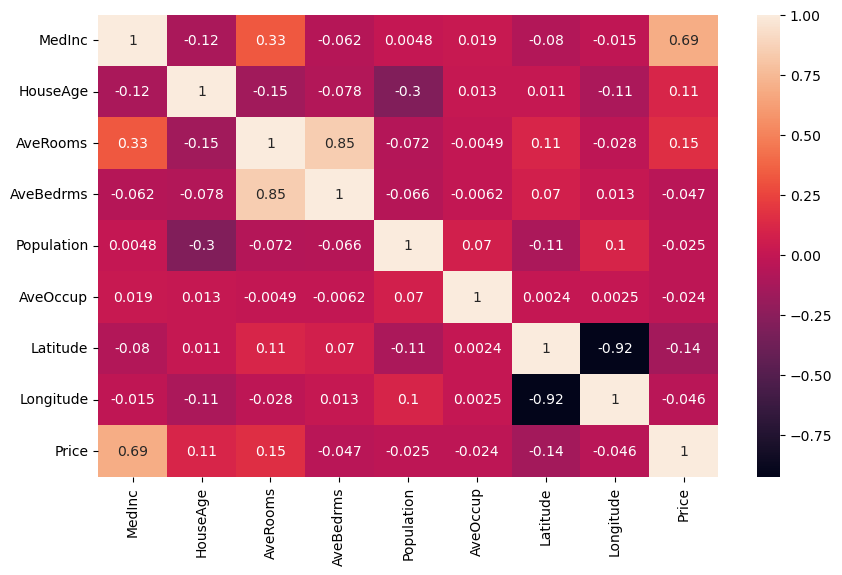

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [11]:
## Dataset has been divided into the independent and dependent feature
X = df.iloc[:,:-1] ##Independent Feature
y = df.iloc[:,-1] ##Dependent Feature

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()

In [23]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
y_pred_test = regression.predict(X_test_scaled)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.5522332399363619
0.537105694300796
0.7431239734636219


In [33]:
import pickle

In [34]:
pickle.dump(regression,open('MODEL_REGRESSION.pkl','wb'))
pickle.dump(scaler,open('MODEL_SCALED.pkl','wb'))

In [37]:
model_regression = pickle.load(open('MODEL_REGRESSION.pkl','rb'))
model_scaled = pickle.load(open('MODEL_SCALED.pkl','rb'))

In [41]:
ready = model_scaled.transform(X_test)

In [42]:
model_regression.predict(ready)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])